In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
path = '../../data/clean/s2_full.csv'
df = pd.read_csv(path)

category_cols = ['dose', 'screen_sex', 'project', 'week', 'menthol_status', 'strength', 'site']
df[category_cols] = df[category_cols].astype('category')

In [4]:
df

,screen_id,week,project,site,dose,screen_sex,screen_age,menthol_status,baseline_cpd,usual_brand,strength,carmine,carmine_nicotine,total_cpd,study_mean,nonstudy_mean,adherence
0,J-A001,week0,project 1,uvm,2.4,Female,29,Non-Menthol,16.142857,Reservation Rollies Regular,regular,NaN,NaN,0.000000,NaN,NaN,NaN
1,J-A001,week01,project 1,uvm,2.4,Female,29,Non-Menthol,16.142857,Reservation Rollies Regular,regular,NaN,NaN,20.142857,20.142857,0.0,1.0
2,J-A001,week02,project 1,uvm,2.4,Female,29,Non-Menthol,16.142857,Reservation Rollies Regular,regular,NaN,NaN,17.857143,17.857143,0.0,1.0
3,J-A001,week03,project 1,uvm,2.4,Female,29,Non-Menthol,16.142857,Reservation Rollies Regular,regular,NaN,NaN,13.666667,13.666667,0.0,1.0
4,J-A001,week04,project 1,uvm,2.4,Female,29,Non-Menthol,16.142857,Reservation Rollies Regular,regular,NaN,NaN,18.333333,18.333333,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9052,J-C165,week08,project 1,jhu,2.4,Female,34,Menthol,19.285714,NaN,NaN,NaN,NaN,20.833333,20.833333,0.0,1.0
9053,J-C165,week09,project 1,jhu,2.4,Female,34,Menthol,19.285714,NaN,NaN,NaN,NaN,20.000000,20.000000,0.0,1.0
9054,J-C165,week10,project 1,jhu,2.4,Female,34,Menthol,19.285714,NaN,NaN,NaN,NaN,20.000000,20.000000,0.0,1.0
9055,J-C165,week11,project 1,jhu,2.4,Female,34,Menthol,19.285714,NaN,NaN,NaN,NaN,20.000000,20.000000,0.0,1.0


Pick an arbitrary row to show in presentation

In [5]:
df.iloc[[120]].transpose()

,120
screen_id,J-A016
week,week02
project,project 1
site,uvm
dose,0.4
screen_sex,Female
screen_age,38
menthol_status,Non-Menthol
baseline_cpd,29.0
usual_brand,Marlboro Red 72s


Continuous

In [6]:
df.describe()

,screen_age,baseline_cpd,carmine_nicotine,total_cpd,study_mean,nonstudy_mean,adherence
count,9057.000000,9057.000000,7437.000000,9057.000000,8268.000000,8267.000000,8162.000000
mean,36.065805,19.786914,17.597916,19.069471,19.232500,1.656937,0.894110
std,11.108000,10.613120,2.091094,15.064543,14.476412,3.392741,0.200769
min,18.000000,0.000000,13.200000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,11.666667,16.100000,8.142857,8.571429,0.000000,0.889772
50%,34.000000,18.571429,17.300000,17.000000,16.857143,0.142857,0.993311
75%,43.000000,24.714286,18.900000,26.142857,25.714286,1.857143,1.000000
max,68.000000,71.285714,29.300000,113.142857,99.000000,40.333333,1.000000


Now, this is longitudinal data that I cleaned in various different ways. Baseline characteristics like sex at birth, age at screening, baseline cigarettes per day, study population (project), study site, experimental dose, menthol status, and usual brand preference are all __permenant__ throughout the trial. I _completed_ the data frame with these values throughout each subject's experimental week entry (`week1` through `week12`) with the values in that subject's `week0` entry. 

Categorical

In [7]:
desc = df[df['week'] == 'week0'].describe(include=['category'])
# desc.to_clipboard()
desc

,week,project,site,dose,screen_sex,menthol_status,strength
count,775,775,775,775.0,775,775,767
unique,1,3,3,3.0,2,2,4
top,week0,project 2,uvm,0.4,Female,Non-Menthol,regular
freq,775,260,509,286.0,551,424,616


In [8]:
df[df['week'] == 'week0'].groupby('site').count()

,screen_id,week,project,dose,screen_sex,screen_age,menthol_status,baseline_cpd,usual_brand,strength,carmine,carmine_nicotine,total_cpd,study_mean,nonstudy_mean,adherence
site,,,,,,,,,,,,,,,,
brown,94,94,94,94,94,94,94,94,94,92,81,81,94,0,0,0
jhu,172,172,172,172,172,172,172,172,171,170,165,165,172,0,0,0
uvm,509,509,509,509,509,509,509,509,509,505,394,394,509,0,0,0


## Outcome variables of interest
### Cigarettes Per Day (CPD)

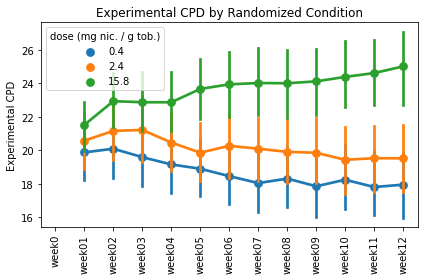

In [9]:
def make_pointplot(df, yvar, ylabel, color_var, legend_title, title, filename):

    fname = "../../reports/figures/" + filename

    sns.pointplot(
        x = 'week',
        y = yvar,
        hue = color_var,
        data = df[df['week'] != 'week0']
        
    )
    plt.xticks(rotation = 90)
    plt.xlabel(None)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title = legend_title)
    plt.tight_layout()

    plt.savefig(fname, dpi = 200)
    plt.show()

make_pointplot(
    df, 
    yvar = 'total_cpd', 
    ylabel = 'Experimental CPD',
    color_var = 'dose',
    legend_title = 'dose (mg nic. / g tob.)',
    title = 'Experimental CPD by Randomized Condition',
    filename = 'cpd_by_week.png'
    )   

### Adherence

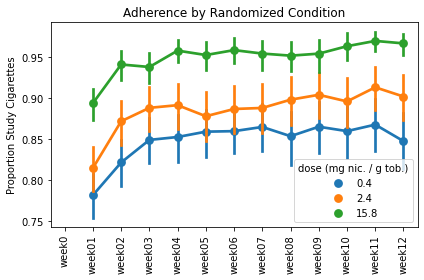

In [10]:
make_pointplot(
    df,
    yvar = 'adherence',
    ylabel = "Proportion Study Cigarettes",
    color_var = 'dose',
    legend_title = 'dose (mg nic. / g tob.)',
    title = 'Adherence by Randomized Condition',
    filename = 'adherence_by_week.png'
)

## Predictors of Interest
### Usual Brand Nicotine Content

In [11]:
# aggregate from greatest to least nicotine content
nic_order = df.groupby(['carmine'])['carmine_nicotine'].aggregate(np.mean).reset_index().sort_values(['carmine_nicotine'], ascending=False)


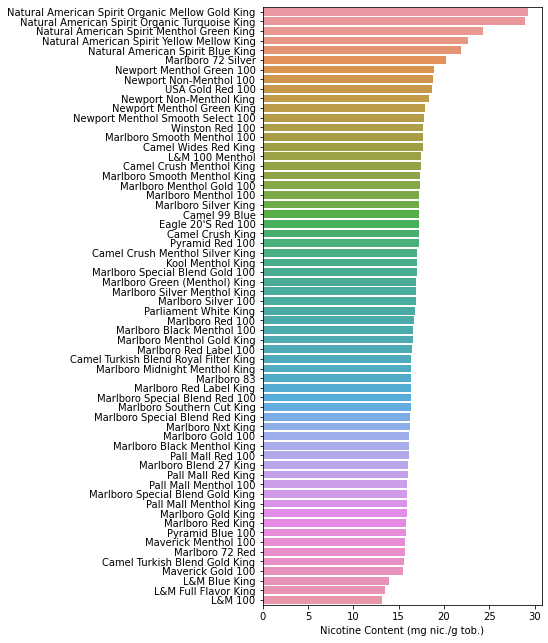

In [12]:


fig, ax = plt.subplots(figsize = (5, 11))
sns.barplot(
    y = 'carmine',
    x = 'carmine_nicotine',
    orient = 'h',
    order = nic_order['carmine'],
    data = df,
    ax = ax
)

plt.ylabel(None)
plt.xlabel('Nicotine Content (mg nic./g tob.)')

plt.savefig("../../reports/figures/nic_content.png", dpi = 200, bbox_inches = 'tight')
plt.show()

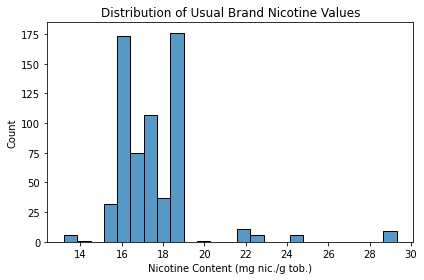

In [13]:
sns.histplot(
    x = 'carmine_nicotine',
    data = df[df['week'] == 'week0']
)

plt.xlabel('Nicotine Content (mg nic./g tob.)')
plt.title('Distribution of Usual Brand Nicotine Values')

plt.tight_layout()
plt.savefig("../../reports/figures/nic_distribution.png", dpi=200)

In [14]:
# participants without UB nicotine values
df['carmine_nicotine'][df['week'] == 'week0'].isna().sum()

135

In [17]:
# participants with nicotine and W12 CPD values
df['carmine_nicotine'][df['week'] == 'week12'].notna().sum()

513

### Usual Brand "Strength"

I have a sneaking suspicion there's an easier way to add labels to a plot...

In [ ]:
strength_order = ['ultra light', 'light', 'regular', 'bold']
strength_counts = df['strength'][df['week'] == 'week0'].value_counts().reset_index()
strength_counts['index'] = pd.Categorical(strength_counts['index'], strength_order)
strength_counts = strength_counts.sort_values("index")
strength_counts['strength'] = 'n = ' + strength_counts['strength'].astype(str)

In [ ]:
strength_counts

,index,strength
3,ultra light,n = 8
1,light,n = 94
0,regular,n = 616
2,bold,n = 49


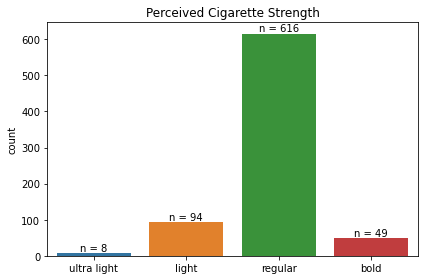

In [ ]:


ax = sns.countplot(
    x = 'strength',
    order = strength_order,
    data = df[df['week'] == 'week0']
)

ax.bar_label(container = ax.containers[0], labels = strength_counts['strength'])
plt.title("Perceived Cigarette Strength")
plt.xlabel(None)

plt.tight_layout()
plt.savefig("../../reports/figures/strength_distribution.png", dpi=200)